In [2]:
import numpy as np
import pandas as pd

# read data from local director
df = pd.read_csv('/Users/apple/PycharmProjects/usCOVID/SocialDistancing_score.csv') 

# read data from relative path in dropbox
#df = pd.read_csv('../PythCode/SocialDistancing_score.csv')

# check if exists unique value / speacial char
print(df)

              Unnamed: 0  15-Jan  16-Jan  17-Jan  18-Jan  19-Jan  20-Jan  \
0                Alabama       0       0       0       0       0       0   
1                 Alaska       0       0       0       0       0       0   
2                Arizona       0       0       0       0       0       0   
3               Arkansas       0       0       0       0       0       0   
4             California       0       0       0       0       0       0   
5               Colorado       0       0       0       0       0       0   
6            Connecticut       0       0       0       0       0       0   
7               Delaware       0       0       0       0       0       0   
8   District of Columbia       0       0       0       0       0       0   
9                Florida       0       0       0       0       0       0   
10               Georgia       0       0       0       0       0       0   
11                Hawaii       0       0       0       0       0       0   
12          

In [3]:
# check the column name
df.columns

Index(['Unnamed: 0', '15-Jan', '16-Jan', '17-Jan', '18-Jan', '19-Jan',
       '20-Jan', '21-Jan', '22-Jan', '23-Jan',
       ...
       '22-Dec', '23-Dec', '24-Dec', '25-Dec', '26-Dec', '27-Dec', '28-Dec',
       '29-Dec', '30-Dec', '31-Dec'],
      dtype='object', length=353)

In [4]:
type(df.columns)

pandas.core.indexes.base.Index

In [5]:
# categorize states into 10 regions:
# step1: match the state to its region id

# source: https://www.hhs.gov/about/agencies/iea/regional-offices/index.html
r1 = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"]
r2 = ["New Jersey", "New York", "Puerto Rico", "Virgin Islands"]
r3 = ["Delaware", "District of Columbia", "Maryland", "Pennsylvania", "Virginia", "West Virginia"]
r4 = ["Alabama", "Florida", "Georgia", "Kentucky", "Mississippi", "North Carolina", "South Carolina", "Tennessee"]
r5 = ["Illinois", "Indiana", "Michigan", "Minnesota", "Ohio", "Wisconsin"]
r6 = ["Arkansas", "Louisiana", "New Mexico", "Oklahoma", "Texas"]
r7 = ["Iowa", "Kansas", "Missouri", "Nebraska"]
r8 = ["Colorado", "Montana", "North Dakota", "South Dakota", "Utah", "Wyoming"]
r9 = ["Arizona", "California", "Hawaii", "Nevada", "American Samoa", "Northern Mariana Islands", "Federated States of Micronesia", "Guam", "Marshall Islands", "Republic of Palau"]
r10 = ["Alaska", "Idaho", "Oregon", "Washington"]

region_id = 0

def find_region(x):
    region = []                           # must initiate the list here, not outside of the function, to avoid lenghth error. The list now stores the result from the latest call.
    for i in x:
        if i in r1:
            region_id = 1
            region.append(region_id)
        
        elif i in r2:
            region_id = 2
            region.append(region_id)
        
        elif i in r3:
            region_id = 3
            region.append(region_id)
        
        elif i in r4:
            region_id = 4
            region.append(region_id)
        
        elif i in r5:
            region_id = 5
            region.append(region_id)
        
        elif i in r6:
            region_id = 6
            region.append(region_id)
        
        elif i in r7:
            region_id = 7
            region.append(region_id)
        
        elif i in r8:
            region_id = 8
            region.append(region_id)
        
        elif i in r9:
            region_id = 9
            region.append(region_id)
        
        elif i in r10:
            region_id = 10
            region.append(region_id)
        
        else: # to find the states that are not in the ten regions
            region_id = -1
            region.append(region_id)
            
    return region

In [6]:
# step2: add the region as a column to the dataframe
df['region'] = find_region(df['Unnamed: 0'])  # the state column
print(df)

# to verify if any states that are not in the 10 regions. 
# previously found virgin islands, northern mariana islands --> input csv uses different names from the website.
df.loc[df['region'] == -1]

              Unnamed: 0  15-Jan  16-Jan  17-Jan  18-Jan  19-Jan  20-Jan  \
0                Alabama       0       0       0       0       0       0   
1                 Alaska       0       0       0       0       0       0   
2                Arizona       0       0       0       0       0       0   
3               Arkansas       0       0       0       0       0       0   
4             California       0       0       0       0       0       0   
5               Colorado       0       0       0       0       0       0   
6            Connecticut       0       0       0       0       0       0   
7               Delaware       0       0       0       0       0       0   
8   District of Columbia       0       0       0       0       0       0   
9                Florida       0       0       0       0       0       0   
10               Georgia       0       0       0       0       0       0   
11                Hawaii       0       0       0       0       0       0   
12          

,Unnamed: 0,15-Jan,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,23-Jan,...,23-Dec,24-Dec,25-Dec,26-Dec,27-Dec,28-Dec,29-Dec,30-Dec,31-Dec,region


In [7]:
df.head()

,Unnamed: 0,15-Jan,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,23-Jan,...,23-Dec,24-Dec,25-Dec,26-Dec,27-Dec,28-Dec,29-Dec,30-Dec,31-Dec,region
0,Alabama,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,4
1,Alaska,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,10
2,Arizona,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,9
3,Arkansas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,6
4,California,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,9


In [8]:
# get the average score of each region on each day
# produce a pandas series

sum_distance = df.groupby(['region']).sum()

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
print(sum_distance)

        15-Jan  16-Jan  17-Jan  18-Jan  19-Jan  20-Jan  21-Jan  22-Jan  \
region                                                                   
1            0       0       0       0       0       0       0       0   
2            0       0       0       0       0       0       0       0   
3            0       0       0       0       0       0       0       0   
4            0       0       0       0       0       0       0       0   
5            0       0       0       0       0       0       0       0   
6            0       0       0       0       0       0       0       0   
7            0       0       0       0       0       0       0       0   
8            0       0       0       0       0       0       0       0   
9            0       0       0       0       0       0       0       0   
10           0       0       0       0       0       0       0       0   

        23-Jan  24-Jan  ...  22-Dec  23-Dec  24-Dec  25-Dec  26-Dec  27-Dec  \
region                  ...     

In [9]:
sum_distance.head()

,15-Jan,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,23-Jan,24-Jan,...,22-Dec,23-Dec,24-Dec,25-Dec,26-Dec,27-Dec,28-Dec,29-Dec,30-Dec,31-Dec
region,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,37,37,37,37,37,37,37,37,37,37
2,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
3,0,0,0,0,0,0,0,0,0,0,...,90,90,90,90,90,90,90,90,90,90
4,0,0,0,0,0,0,0,0,0,0,...,44,44,44,44,44,44,44,44,44,44
5,0,0,0,0,0,0,0,0,0,0,...,62,62,62,62,62,62,62,62,62,62


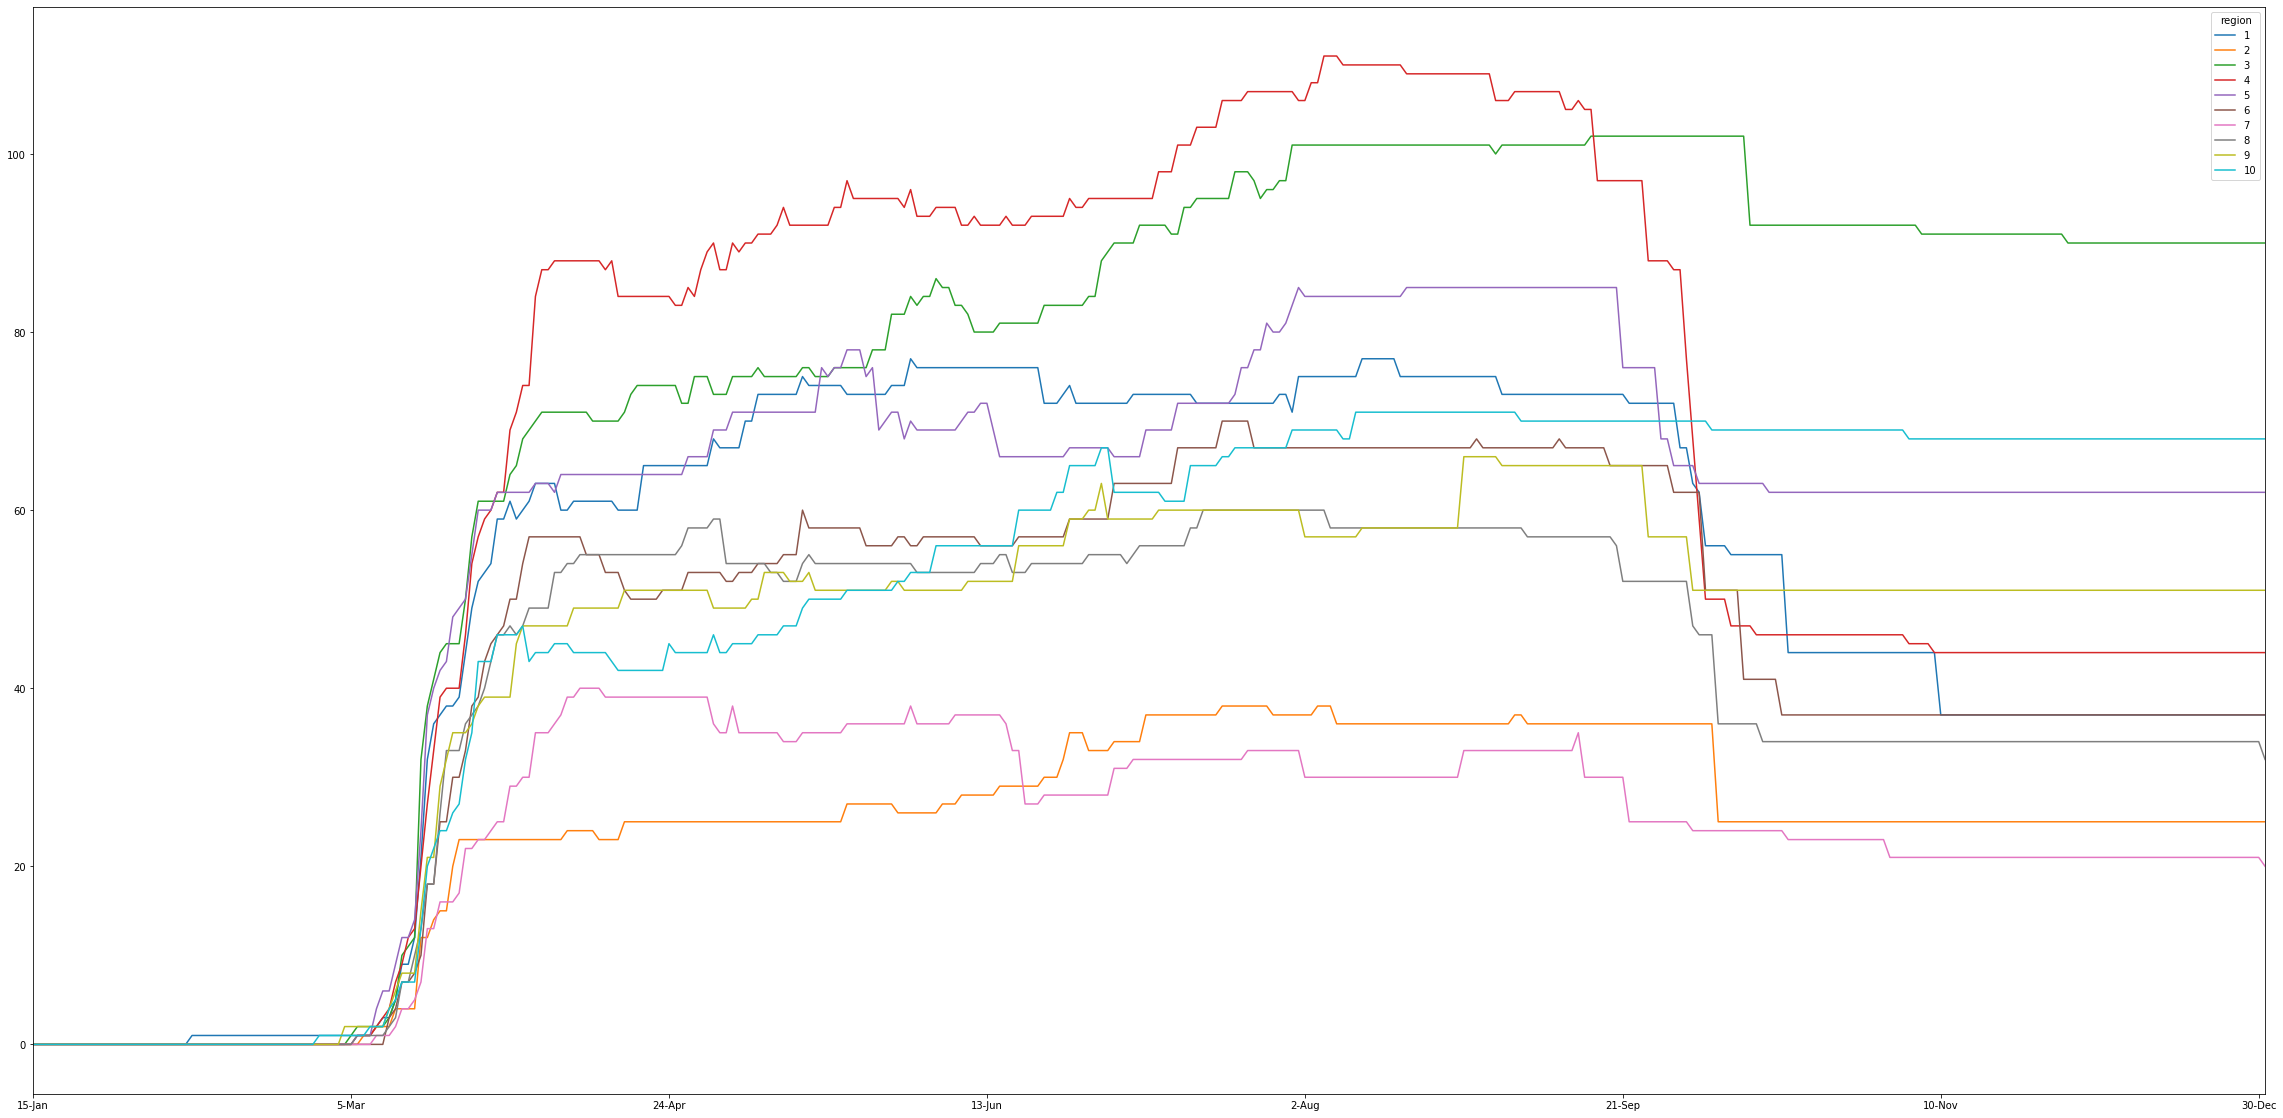

In [20]:
%matplotlib inline
sum_distance.transpose().plot(figsize=(40,20))

In [13]:
sum_distance.to_csv('/Users/apple/PycharmProjects/usCOVID/output/social_distance_sum.csv')

In [14]:
avg_distance = df.groupby(['region']).mean()
avg_distance.to_csv('/Users/apple/PycharmProjects/usCOVID/output/social_distance_avg.csv')

In [15]:
avg_distance.head() # the column names can be changed in the excel by "format cells"

,15-Jan,16-Jan,17-Jan,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,23-Jan,24-Jan,...,22-Dec,23-Dec,24-Dec,25-Dec,26-Dec,27-Dec,28-Dec,29-Dec,30-Dec,31-Dec
region,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.166667,6.166667,6.166667,6.166667,6.166667,6.166667,6.166667,6.166667,6.166667,6.166667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.333333,10.333333,10.333333,10.333333,10.333333,10.333333,10.333333,10.333333,10.333333,10.333333


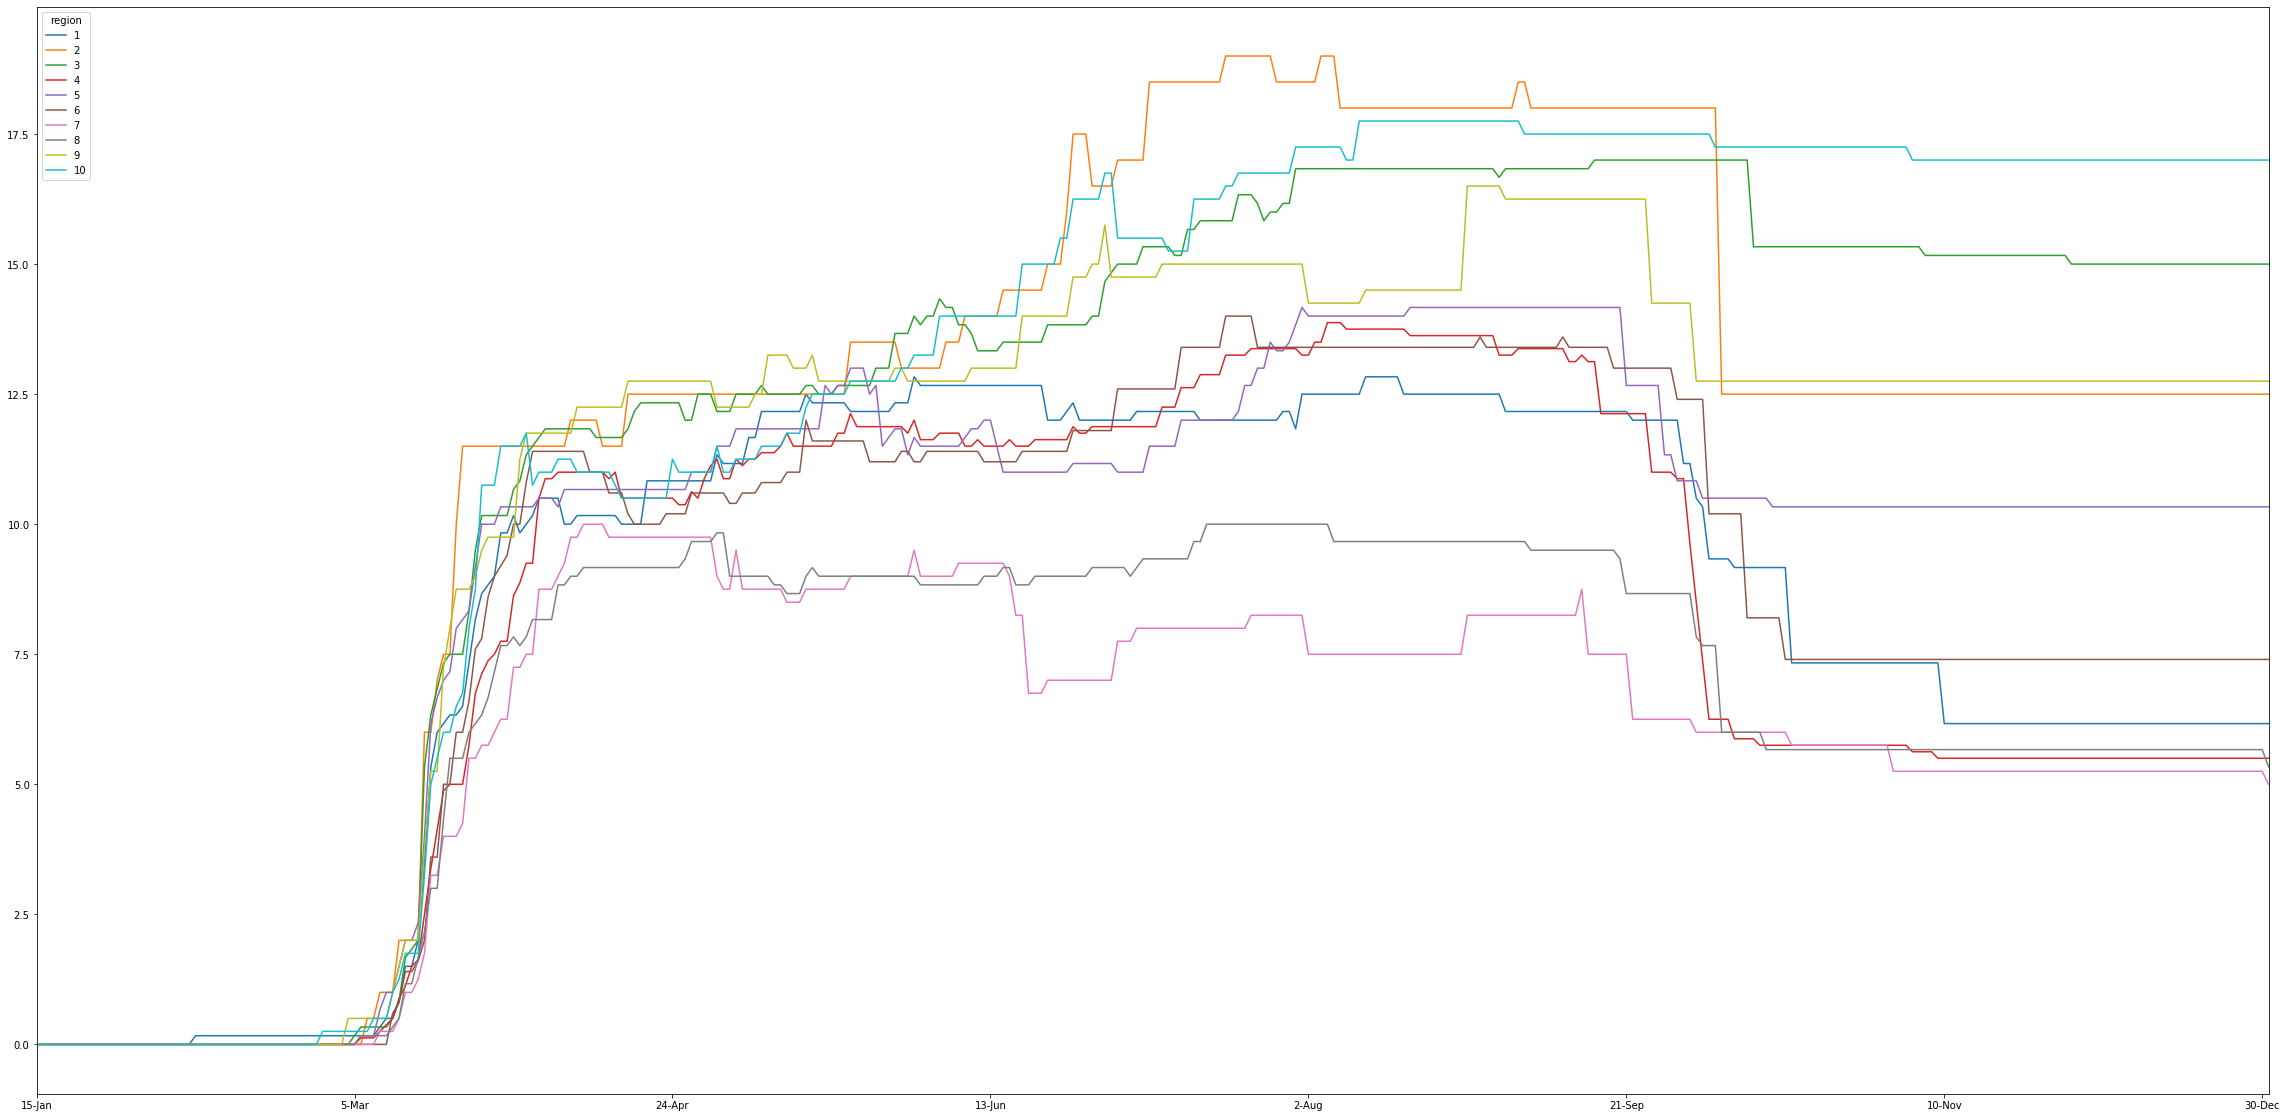

In [19]:
avg_distance.transpose().plot(figsize=(40,20))